# Analisis de una base de datos no supervisada

Gracias a los datos que nos proporcionó Raquel sobre pacientes con diabetes tipo II, hemos realizado un análisis sobre datos no supervisados.

1. El primer paso es por tanto importar la base de datos y hacer un resumen estadístico a ver si podemos encontrar algunos valores raros que necesitemos limpiar.

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('BD Exernet Sujetos con Bioquímica.xlsx')

In [3]:
df.describe()

,Codigo,Glucosa_C,Creatinina_C,Filt_Glom_C,A.Urico_C,Urea_C,Na_C,K_C,Cl_C,Ca_C,...,Neutr_Tot_C,Linfo_Tot_C,Mono_Tot_C,Eos_Tot_C,Baso_Tot_C,Neutro%_C,Linfo%_C,Mono%_C,Eos%_C,Baso%_C
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,...,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,34070.834225,96.516934,-0.591569,71.473731,3.433868,17.798574,27.677362,2.886061,7.905526,7.673993,...,3.684349,2.587629,0.536756,0.191604,0.024510,54.964249,33.764230,8.183646,2.928632,0.464409
std,16991.899402,31.402004,11.848823,24.696022,12.397616,54.918840,120.847473,13.752334,101.996393,13.640593,...,1.277213,8.896711,0.193175,0.130816,0.029151,9.066097,11.806956,2.402727,1.936140,0.280799
min,11002.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,1.300000,0.430000,0.120000,0.000000,0.000000,23.500000,9.500000,3.000000,0.000000,0.000000
25%,13065.000000,86.000000,0.700000,64.157246,4.000000,30.000000,-99.000000,4.310000,-99.000000,9.100000,...,2.790000,1.670000,0.400000,0.100000,0.000000,49.000000,27.900000,6.500000,1.600000,0.289855
50%,32243.000000,95.000000,0.800000,76.105439,4.700000,38.000000,138.000000,4.630000,100.000000,9.400000,...,3.500000,2.140000,0.500000,0.170000,0.020000,54.881266,33.100000,7.900000,2.500000,0.400000
75%,52140.000000,107.000000,0.900000,84.967257,5.700000,46.000000,143.000000,4.960000,105.000000,9.700000,...,4.390000,2.600000,0.650000,0.240000,0.030000,61.200000,38.400000,9.500000,3.500000,0.600000
max,53205.000000,274.000000,2.500000,106.013438,9.400000,143.000000,151.000000,8.300000,114.000000,11.400000,...,13.300000,212.000000,1.500000,0.950000,0.110000,87.100000,229.900000,19.400000,17.300000,2.016129


## Limpieza de los datos

2. El siguiente paso será limpiar los datos.

Lo primero que vimos que es que había un error en la columna `Fecha_Reg_C`. Esta columna no contenía información que fuera necesaria, así que lo primero fue quitarnos esta columna.

In [5]:
df1=df.drop('Fecha_Reg_C',axis=1)

In [18]:
#df1.to_excel('new1.xlsx')
#df3 = pd.read_excel('new1.xlsx')

In [6]:
df1.describe()

,Codigo,Glucosa_C,Creatinina_C,Filt_Glom_C,A.Urico_C,Urea_C,Na_C,K_C,Cl_C,Ca_C,...,Neutr_Tot_C,Linfo_Tot_C,Mono_Tot_C,Eos_Tot_C,Baso_Tot_C,Neutro%_C,Linfo%_C,Mono%_C,Eos%_C,Baso%_C
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,...,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,34070.834225,96.516934,-0.591569,71.473731,3.433868,17.798574,27.677362,2.886061,7.905526,7.673993,...,3.684349,2.587629,0.536756,0.191604,0.024510,54.964249,33.764230,8.183646,2.928632,0.464409
std,16991.899402,31.402004,11.848823,24.696022,12.397616,54.918840,120.847473,13.752334,101.996393,13.640593,...,1.277213,8.896711,0.193175,0.130816,0.029151,9.066097,11.806956,2.402727,1.936140,0.280799
min,11002.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,1.300000,0.430000,0.120000,0.000000,0.000000,23.500000,9.500000,3.000000,0.000000,0.000000
25%,13065.000000,86.000000,0.700000,64.157246,4.000000,30.000000,-99.000000,4.310000,-99.000000,9.100000,...,2.790000,1.670000,0.400000,0.100000,0.000000,49.000000,27.900000,6.500000,1.600000,0.289855
50%,32243.000000,95.000000,0.800000,76.105439,4.700000,38.000000,138.000000,4.630000,100.000000,9.400000,...,3.500000,2.140000,0.500000,0.170000,0.020000,54.881266,33.100000,7.900000,2.500000,0.400000
75%,52140.000000,107.000000,0.900000,84.967257,5.700000,46.000000,143.000000,4.960000,105.000000,9.700000,...,4.390000,2.600000,0.650000,0.240000,0.030000,61.200000,38.400000,9.500000,3.500000,0.600000
max,53205.000000,274.000000,2.500000,106.013438,9.400000,143.000000,151.000000,8.300000,114.000000,11.400000,...,13.300000,212.000000,1.500000,0.950000,0.110000,87.100000,229.900000,19.400000,17.300000,2.016129


Inicialmente vemos que hay un montón de datos mínimos de `-99`, como nos podemos imaginar esos datos son para decir que no tenemos datos en esos valores.

3. Para ver como están afectando hagamos un histograma de todas las variables

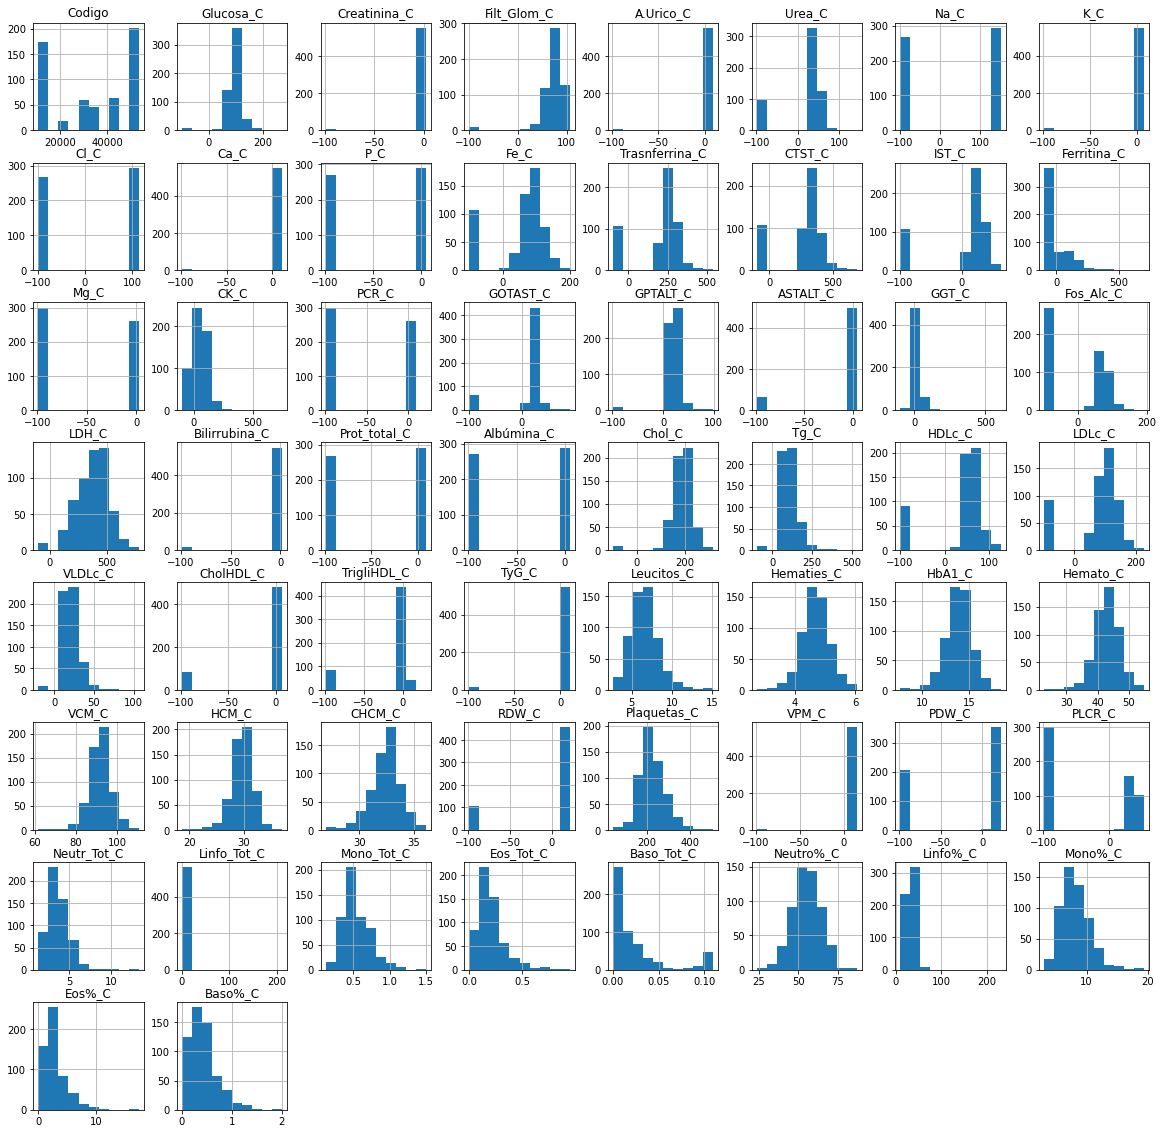

In [7]:
df1.hist(figsize=(20,20));

Con estos histogramas vemos que variables no merece la pena conservar porque hay más -99 en sus datos que los datos reales: Na_C,Cl_C, P_C, Mg_C, PCR_C, Fos_Alc_C, Prot_total_C, Albumina_C, PLCR_C. Esta claro que esas variables hay que eliminarlas

In [8]:
df2=df1.drop(['Na_C','Cl_C', 'P_C', 'Mg_C', 'PCR_C', 'Fos_Alc_C', 'Prot_total_C', 'Albúmina_C', 'PLCR_C'], axis=1)

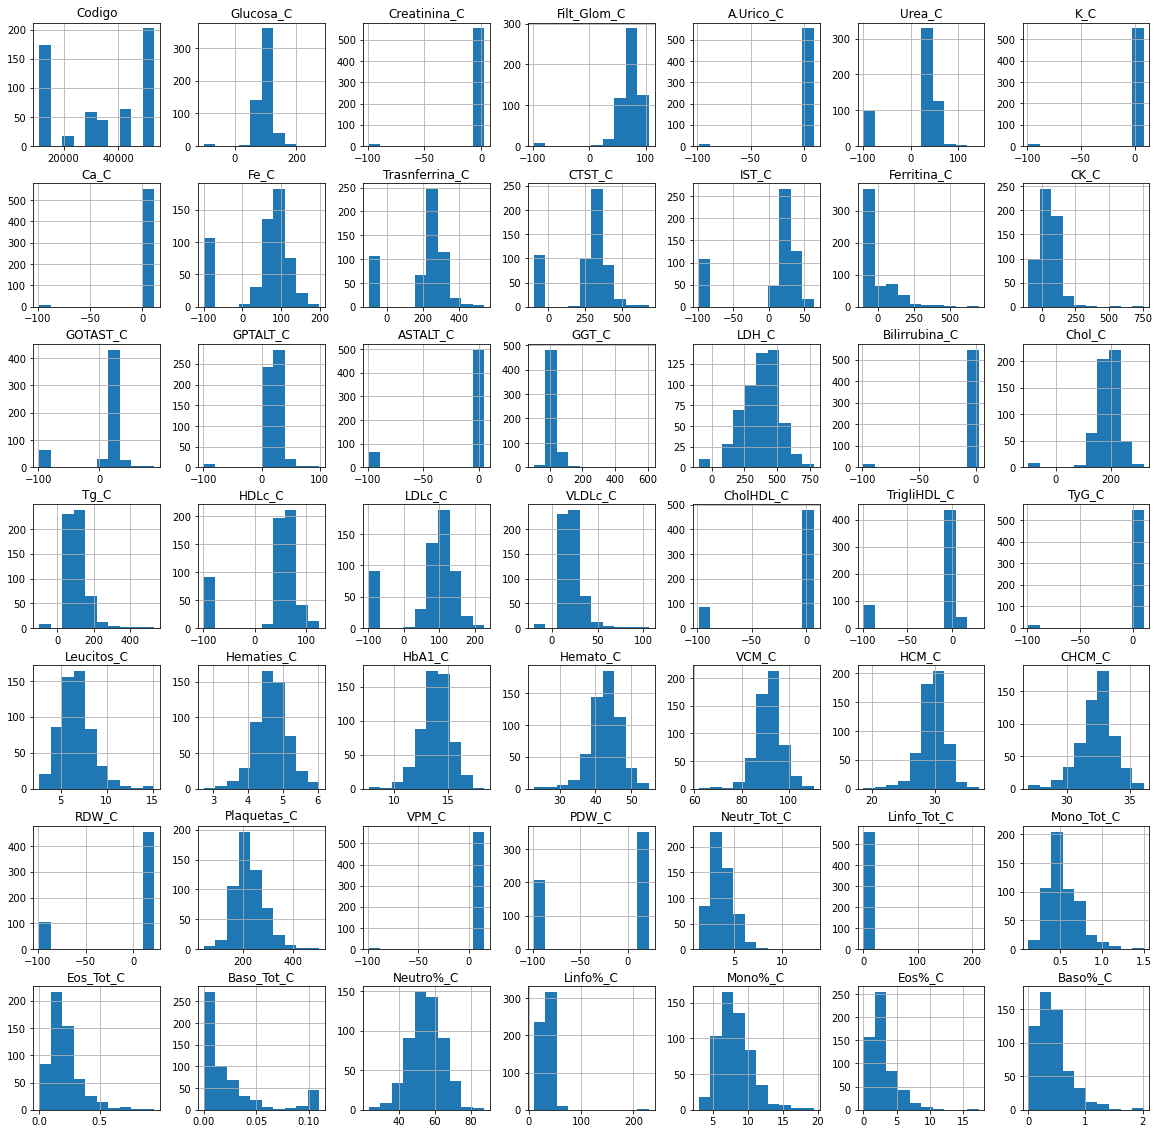

In [9]:
df2.hist(figsize=(20,20));

Volviendo a ver yo diría que tendríamos que quitar las siguientes variables: 'Urea_C','Fe_C','Trasnferrina_C','CTST_C','IST_C','GOTAST_C','ASTALT_C','HDLc_C','LDLc_C','CholHDL_C','TrigliHDL_C'

In [10]:
df3=df2.drop(['Urea_C','Fe_C','RDW_C','PDW_C','Trasnferrina_C','CTST_C','IST_C','GOTAST_C','ASTALT_C','HDLc_C','LDLc_C','CholHDL_C','TrigliHDL_C'], axis=1)

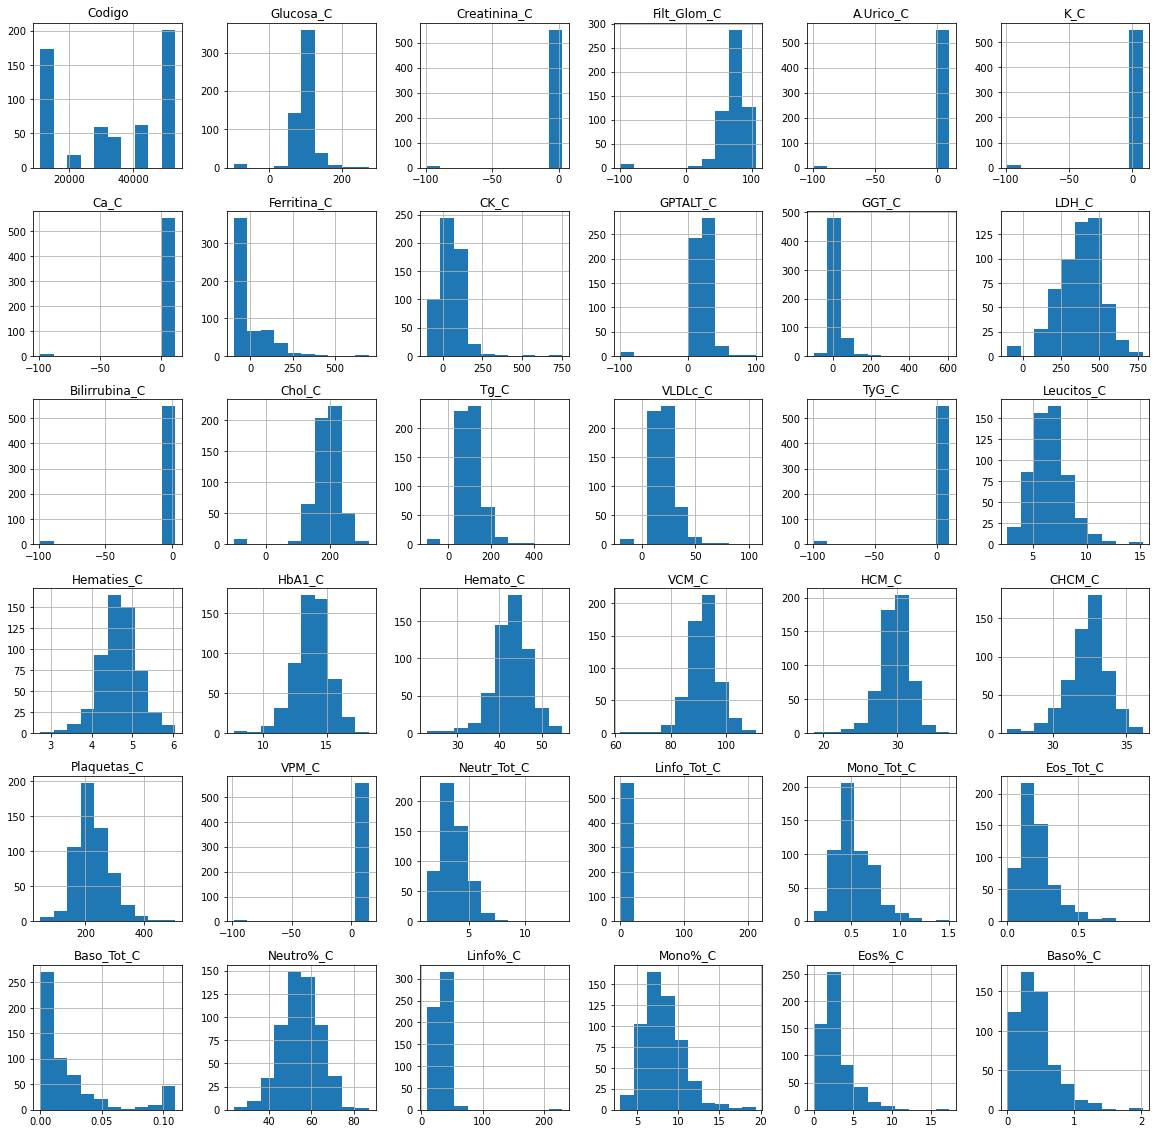

In [11]:
df3.hist(figsize=(20,20));

In [12]:
df4 = df3[(df3.Glucosa_C!=-99)& (df3.Creatinina_C!=-99)]

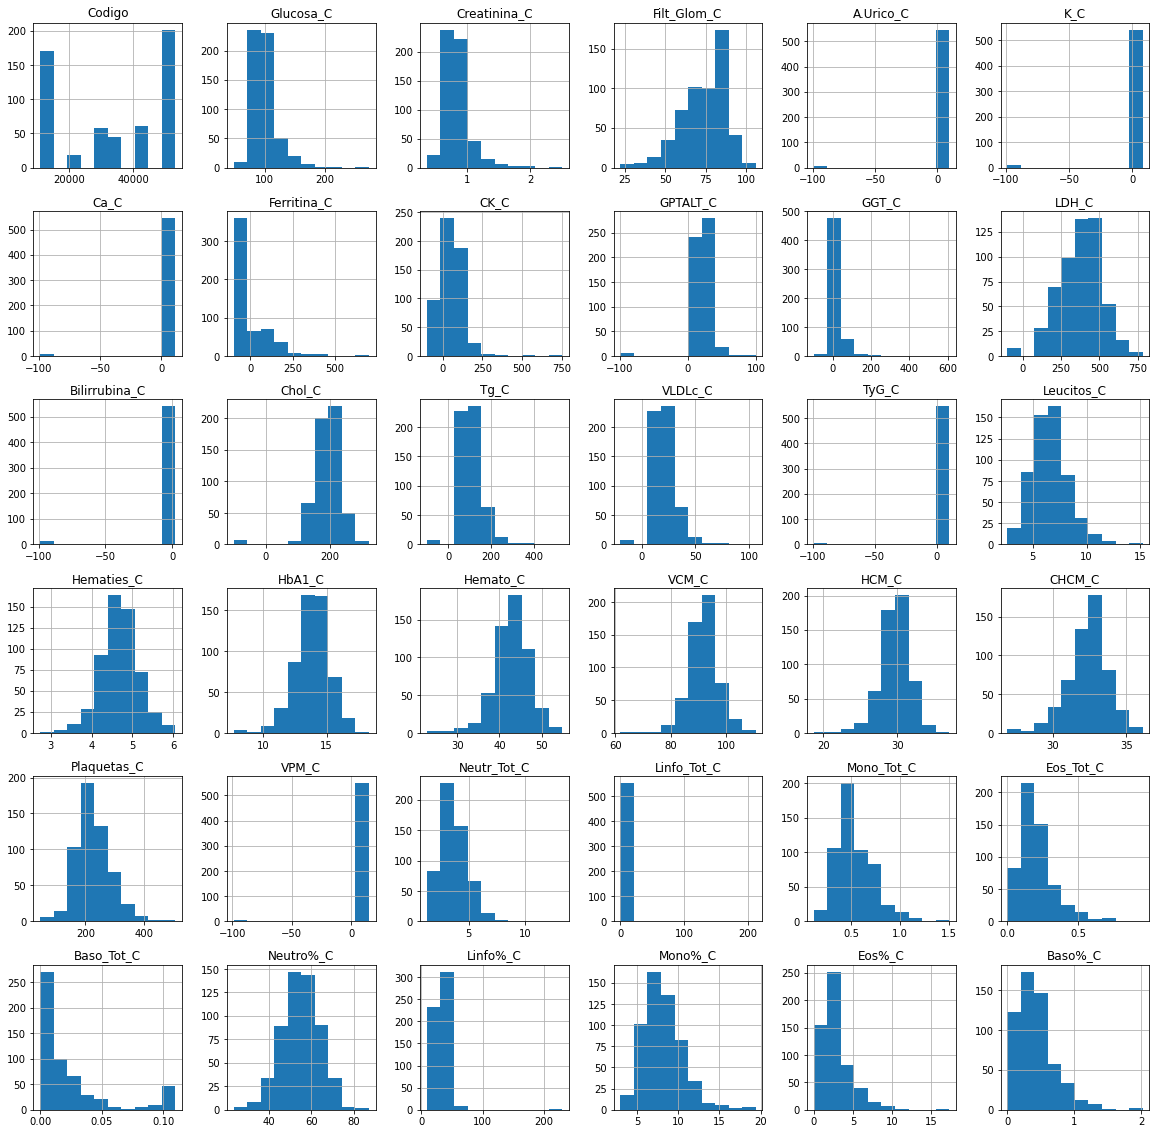

In [13]:
df4.hist(figsize=(20,20));

In [14]:
df5 = df4[(df4['A.Urico_C']!=-99) & (df4.K_C!=-99)& (df4.Ca_C!=-99) &(df4.Bilirrubina_C!=-99)]

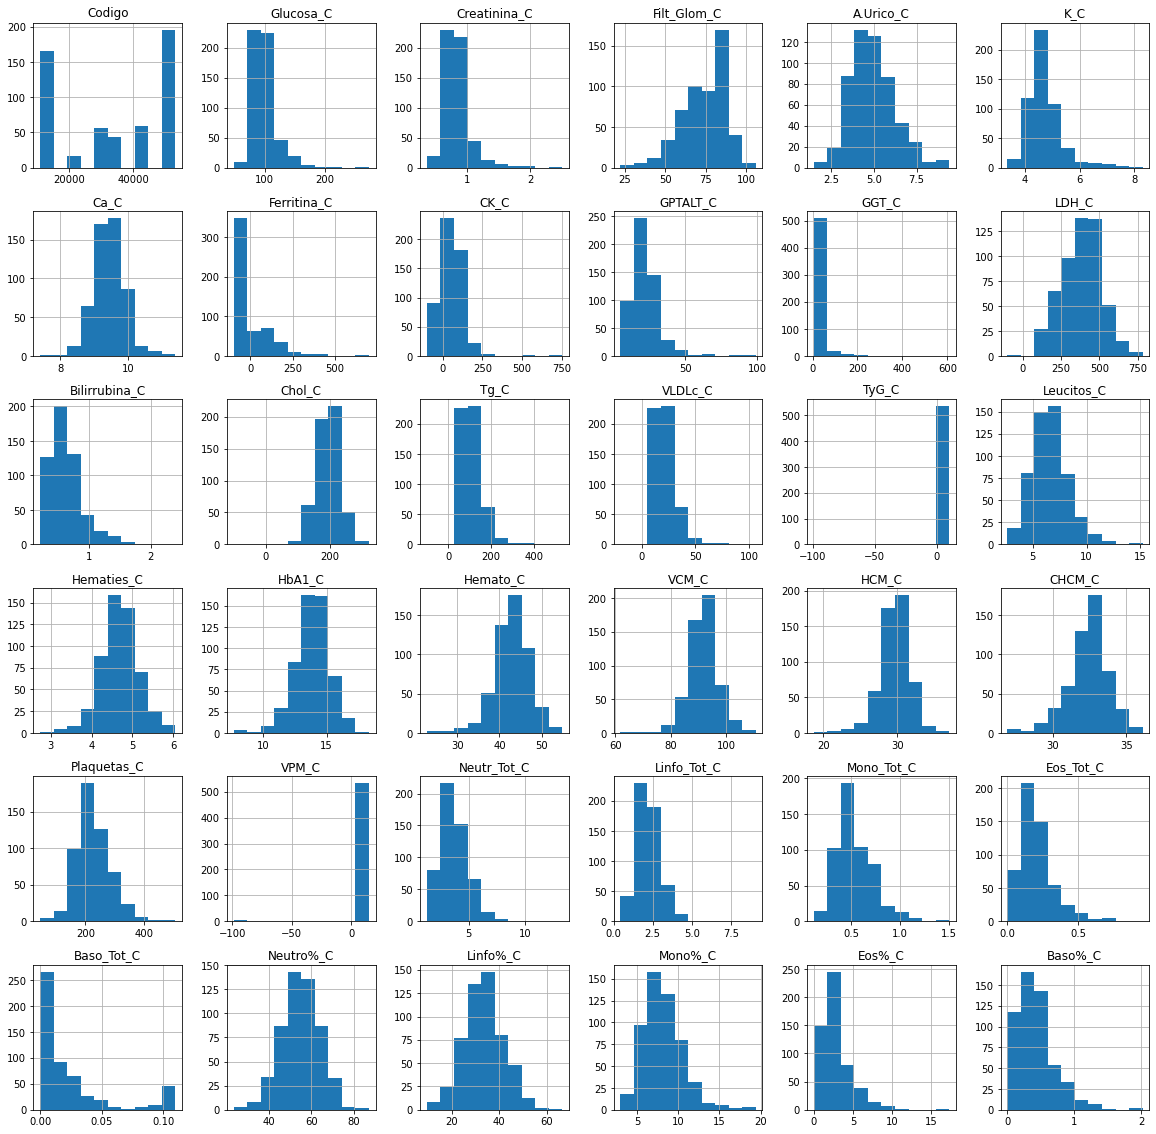

In [15]:
df5.hist(figsize=(20,20));

In [16]:
df6=df5[(df5['VPM_C']!=-99) & (df5.TyG_C!=-99)&(df5.Chol_C!=-99)&(df5.Ferritina_C!=-99)]

In [17]:
df7=df6.drop(['Codigo','Baso_Tot_C'],axis=1)

In [18]:
df7.head()

,Glucosa_C,Creatinina_C,Filt_Glom_C,A.Urico_C,K_C,Ca_C,Ferritina_C,CK_C,GPTALT_C,GGT_C,...,VPM_C,Neutr_Tot_C,Linfo_Tot_C,Mono_Tot_C,Eos_Tot_C,Neutro%_C,Linfo%_C,Mono%_C,Eos%_C,Baso%_C
365,101,1.3,53.4,6.7,4.79,9.9,352,103,18,18,...,10.9,4.0,1.6,1.1,0.6,54.9,21.3,15.3,7.6,0.9
366,86,1.2,56.8,7.2,4.14,9.6,163,113,16,11,...,10.6,3.5,9.1,1.0,0.1,25.4,66.5,7.2,0.6,0.3
368,133,0.9,59.7,5.3,4.85,9.5,26,135,11,44,...,8.2,5.3,2.6,0.4,0.2,61.4,30.6,5.2,2.3,0.5
369,101,1.1,46.5,5.8,4.68,10.9,22,17,10,14,...,9.9,3.1,3.1,0.5,0.2,44.8,43.9,7.4,3.2,0.7
370,91,0.7,86.2,5.6,4.09,10.0,100,63,39,62,...,10.0,3.4,3.5,0.7,0.2,42.9,44.5,9.5,2.4,0.7


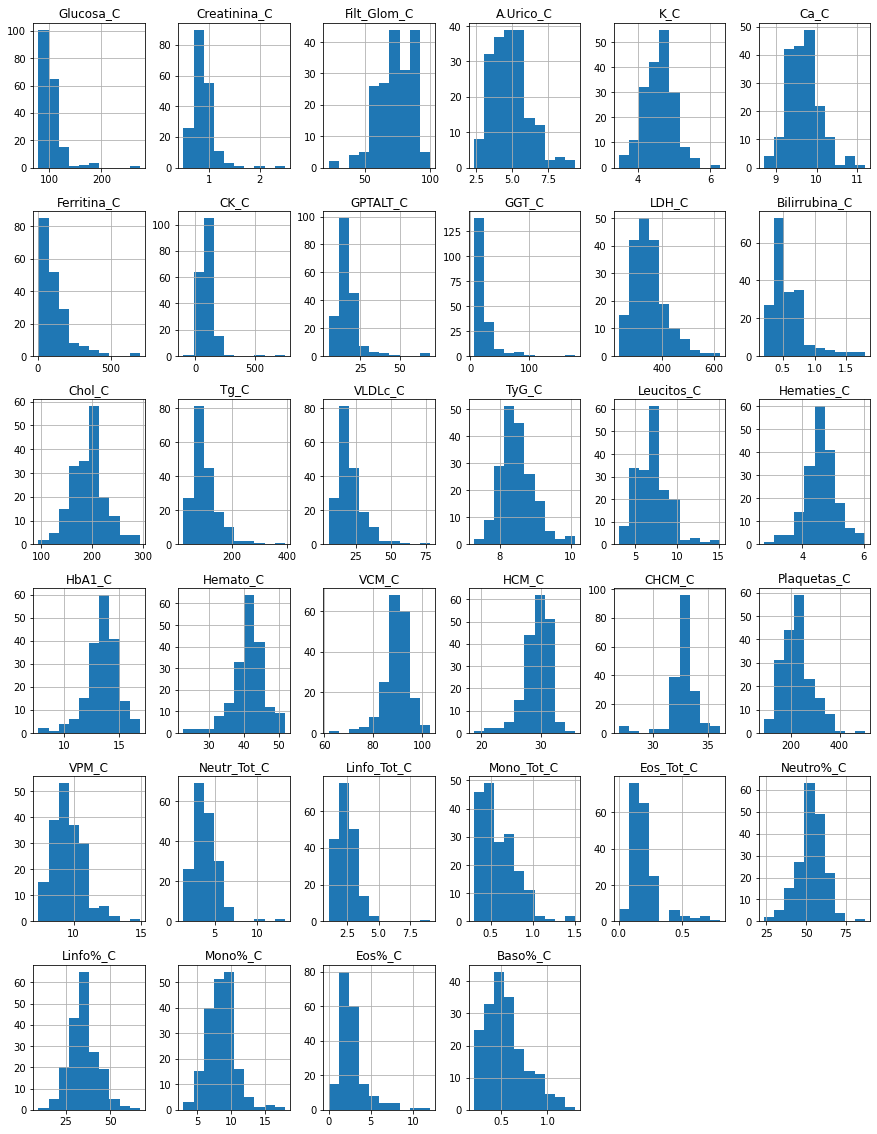

In [19]:
df7.hist(figsize=(15, 20));

In [20]:
df7.to_excel('df_clean.xlsx')

## Preprocessing and scaling

Como tenemos datos con características en muy diferentes escalas, una cosa que suele hacerse es el escalado de los datos. Hay diferentes tipos de escalado pero usemos un escalado estandar.

In [33]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [22]:
scaler = StandardScaler()
scaler.fit(df7)

StandardScaler()

In [23]:
X_scaled = scaler.transform(df7)

## PCA analysis

In [24]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=2)
# fit PCA model Raquel data 
pca.fit(X_scaled)

PCA(n_components=2)

In [25]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (188, 34)
Reduced shape: (188, 2)


Text(0, 0.5, 'Second principal component')

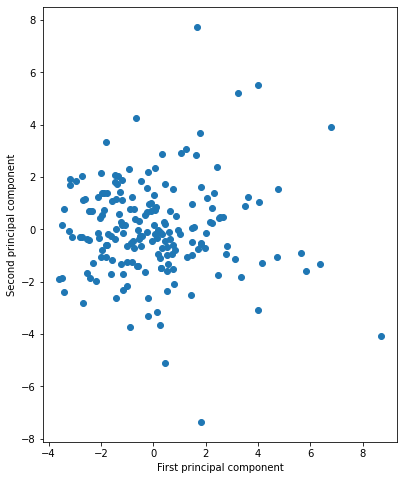

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [30]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 34)
PCA components:
[[ 2.25779587e-01  2.26431400e-01 -1.97806791e-01  2.01542016e-01
  -1.25305892e-03  8.38661720e-02  6.53567519e-02 -2.69427226e-02
   1.17428670e-02  1.19460331e-01 -1.17600841e-01  5.11269954e-02
  -5.05796990e-02  2.84520878e-01  2.84520878e-01  3.22252855e-01
   3.58069760e-01 -9.42576340e-02 -1.42609975e-01 -1.50490340e-01
  -1.01394442e-01 -4.94742003e-02  5.00222236e-02  1.47935127e-01
   6.11209791e-03  3.34919212e-01  1.74330641e-01  2.64667373e-01
   1.52559974e-01  1.58238586e-01 -1.52136654e-01 -7.11791048e-02
   3.87023770e-03 -2.05650436e-02]
 [-2.54053776e-04 -1.11863569e-01  7.79367372e-02 -9.26736715e-02
   8.81423455e-02 -7.25261353e-02 -1.16505455e-01  1.18900464e-01
  -1.00223021e-01  5.41589412e-02  6.98605914e-02 -1.08148608e-01
  -1.12230137e-01 -2.06413146e-01 -2.06413146e-01 -2.02102467e-01
   1.15446088e-03 -1.83516723e-01 -3.25842363e-01 -2.90581974e-01
  -2.11711752e-01 -1.96323321e-01 -7.96866987e-02  1.00177302e

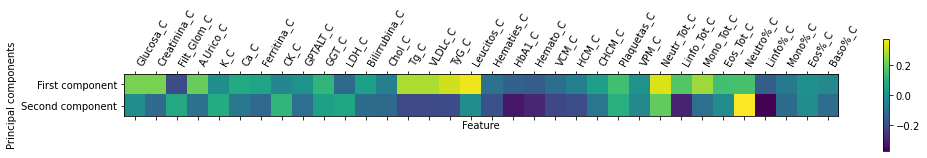

In [32]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(df7.columns)), df7.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [155]:
from sklearn.cluster import KMeans

In [156]:
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(df7)
y_pred = kmeans.predict(df7)

In [157]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [158]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt


In [159]:

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances 
# bridged when performing agglomerative clustering
linkage_array = ward(df7)

Text(0, 0.5, 'Cluster distance')

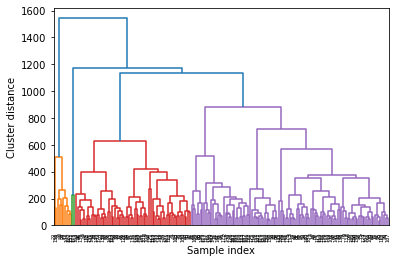

In [160]:
# Now we plot the dendrogram for the linkage_array containing the distances # between clusters
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
#ax.plot(bounds, [7.25, 7.25], '--', c='k')
#ax.plot(bounds, [4, 4], '--', c='k')
#ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
#ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [148]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(df7)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df7)
X_scaled = scaler.transform(df7)
dbscan = DBSCAN()
clusters2 = dbscan.fit_predict(X_scaled)

In [150]:
print(clusters2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
